# Data Analyst Technical Challenge (Statistical Focus)

### Import necessary libraries

In [1]:
import os
from dotenv import load_dotenv
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

### Define paths

In [2]:
current_path = os.getcwd()
data_folder = os.path.join(current_path, 'data')
device_path = os.path.join(data_folder, 'DeviceProperty.csv')
production_path = os.path.join(data_folder, 'ProductionMetric.csv')
quality_path = os.path.join(data_folder, 'Quality.csv')

### ETL
Load the data from data folder as dataframe.

In [3]:
device_df = pd.read_csv(device_path)
production_df = pd.read_csv(production_path)
quality_df = pd.read_csv(quality_path)

#### Define database configuration and create a SQL engine
I am using my local SQL server in this notebook. If you want to run this notebook, feel free to change to your SQL configuration. 

In [4]:
# Define SQL configurations
load_dotenv()
database_config = {
        'username': os.getenv('DB_USERNAME'),
        'password': os.getenv('DB_PASSWORD'),
        'host': 'localhost',
        'port':'5432',
        'database':'BeerBo',
        'schema': 'public'  
        }

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
            database_config['username'],
            database_config['password'],
            database_config['host'],
            database_config['port'],
            database_config['database'],
        ))

Load the data into the SQL server

In [5]:
device_df.to_sql('DeviceProperty', engine, index=False, if_exists='replace')
production_df.to_sql('ProductionMetric', engine, index=False, if_exists='replace')
quality_df.to_sql('Quality', engine, index=False, if_exists='replace')

170

## EDA
Let's take a quick look at the first 5 rows of the datasets.

In [6]:
device_df.head()

,deviceKey,Area,DefaultCycleTime,Enterprise,Line,Location,Operation,Plant,SubType,Type
0,Line1,Assembly-2,50,ManuCorp,AssemblyMain,Building G,Advanced Assembly,NorthPlant,HighSpeed,Production-Premium
1,Line2,Fab-Pro,75,ManuCorp,WeldingPrimary,Building C-2,Laser Welding,SouthPlant,Precision,Production-Laser
2,Line3,Paint-Auto,100,ManuCorp,PaintingMain,Building D-2,Electrostatic Paint,WestPlant,E-Coat,Production-Finish
3,Line4,Smart-Logistics,20,ManuCorp,MaterialFlow,Building J,AGV Transfer,WestPlant,Automated,Smart-Logistics


In [7]:
production_df.head()

,prodmetric_stream_key,deviceKey,start_time,end_time,good_count,reject_count,ideal_time,run_time,unplanned_stop_time,planned_stop_time,unplanned_stop_time.1,performance_impact_display_name,process_state_display_name,process_state_reason_display_name,job_display_name,part_display_name,shift_display_name,team_display_name
0,5552062,Line3,2025-01-29 19:10:14.3284760 -06:00,2025-01-29 19:13:19.6285480 -06:00,0,0,0.000000,0.000000,185.300072,0.0,185.300072,Unplanned Stop,Down,Security Alarm,Part D-4000,Part D,Second Shift,Team 2
1,5552060,Line3,2025-01-29 19:05:37.3369440 -06:00,2025-01-29 19:10:14.3284760 -06:00,96,0,157.363822,276.991532,0.000000,0.0,0.000000,Run,Running,Running Normally,Part D-4000,Part D,Second Shift,Team 2
2,5552046,Line4,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:02:07.0000000 -06:00,54,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part J-4000,Part J,Second Shift,Team 3
3,5552048,Line2,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:34.0000000 -06:00,0,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part M-3000,Part M,Second Shift,Team 3
4,5552049,Line1,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:52.0000000 -06:00,67,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part P-2000,Part P,Second Shift,Team 2


In [8]:
quality_df.head()

,quality_stream_key,deviceKey,count,reject_reason_display_name,prodmetric_stream_key
0,1771948,Line 4,6,Detected by Max WIP,5468380
1,1772152,Line 4,11,Reject,5468383
2,1772153,Line 4,9,Detected by Max WIP,5468383
3,1772154,Line 4,11,Detected by Max WIP,5468386
4,1772155,Line 4,9,Reject,5468386


Quickly check variable type and missing value.

In [9]:
device_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   deviceKey         4 non-null      object
 1   Area              4 non-null      object
 2   DefaultCycleTime  4 non-null      int64 
 3   Enterprise        4 non-null      object
 4   Line              4 non-null      object
 5   Location          4 non-null      object
 6   Operation         4 non-null      object
 7   Plant             4 non-null      object
 8   SubType           4 non-null      object
 9   Type              4 non-null      object
dtypes: int64(1), object(9)
memory usage: 452.0+ bytes


In [10]:
production_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   prodmetric_stream_key              10000 non-null  int64  
 1   deviceKey                          10000 non-null  object 
 2   start_time                         10000 non-null  object 
 3   end_time                           10000 non-null  object 
 4   good_count                         10000 non-null  int64  
 5   reject_count                       10000 non-null  int64  
 6   ideal_time                         10000 non-null  float64
 7   run_time                           10000 non-null  float64
 8   unplanned_stop_time                10000 non-null  float64
 9   planned_stop_time                  10000 non-null  float64
 10  unplanned_stop_time.1              10000 non-null  float64
 11  performance_impact_display_name    10000 non-null  obje

`start_time` and `end_time` need to be in datetime format.


In [11]:
quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7170 entries, 0 to 7169
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   quality_stream_key          7170 non-null   int64 
 1   deviceKey                   7170 non-null   object
 2   count                       7170 non-null   int64 
 3   reject_reason_display_name  7170 non-null   object
 4   prodmetric_stream_key       7170 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 280.2+ KB


Upon first look, there is no missing value in all three datasets.

#### Categorical Variables Investigation

In [12]:
def print_categorical_value_counts(df, columns=None, max_unique=20):
    """
    Prints value counts for each categorical column in a DataFrame.
    
    Parameters:
    - df: pd.DataFrame
    - columns: list of column names (default = all object-type columns)
    - max_unique: only include columns with <= this number of unique values
    """
    if columns is None:
        columns = df.select_dtypes(include='object').columns
    
    for col in columns:
        unique_vals = df[col].nunique(dropna=False)
        if unique_vals <= max_unique:
            print(f"\nValue counts for '{col}' (unique: {unique_vals}):")
            print(df[col].value_counts(dropna=False))

In [13]:
print_categorical_value_counts(device_df)
print_categorical_value_counts(production_df)
print_categorical_value_counts(quality_df)


Value counts for 'deviceKey' (unique: 4):
deviceKey
Line1    1
Line2    1
Line3    1
Line4    1
Name: count, dtype: int64

Value counts for 'Area' (unique: 4):
Area
Assembly-2         1
Fab-Pro            1
Paint-Auto         1
Smart-Logistics    1
Name: count, dtype: int64

Value counts for 'Enterprise' (unique: 1):
Enterprise
ManuCorp    4
Name: count, dtype: int64

Value counts for 'Line' (unique: 4):
Line
AssemblyMain      1
WeldingPrimary    1
PaintingMain      1
MaterialFlow      1
Name: count, dtype: int64

Value counts for 'Location' (unique: 4):
Location
Building G      1
Building C-2    1
Building D-2    1
Building J      1
Name: count, dtype: int64

Value counts for 'Operation' (unique: 4):
Operation
Advanced Assembly      1
Laser Welding          1
Electrostatic Paint    1
AGV Transfer           1
Name: count, dtype: int64

Value counts for 'Plant' (unique: 3):
Plant
WestPlant     2
NorthPlant    1
SouthPlant    1
Name: count, dtype: int64

Value counts for 'SubType' (uniq

For `team_display_name` and `shift_display_name`, some categories—such as "No Shift", "Unknown Shift", "No Team", and "Unknown Team"—may indicate missing or improperly recorded values. This indicates the need for further investigation to determine whether they represent valid categories or should be treated as missing data.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_distribution(data, variable):
    """
    Plots a bar chart showing the frequency distribution of a categorical variable.

    Parameters:
    - data: pd.DataFrame
    - variable: str, name of the categorical column
    """
    if variable not in data.columns:
        raise ValueError(f"'{variable}' is not a column in the provided DataFrame.")

    # Count occurrences
    value_counts = data[variable].value_counts().reset_index()
    value_counts.columns = [variable, 'count']

    # Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=variable, y='count', data=value_counts)
    plt.title(f'Distribution of {variable}', fontsize=14)
    plt.xlabel(variable.replace('_', ' ').title(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


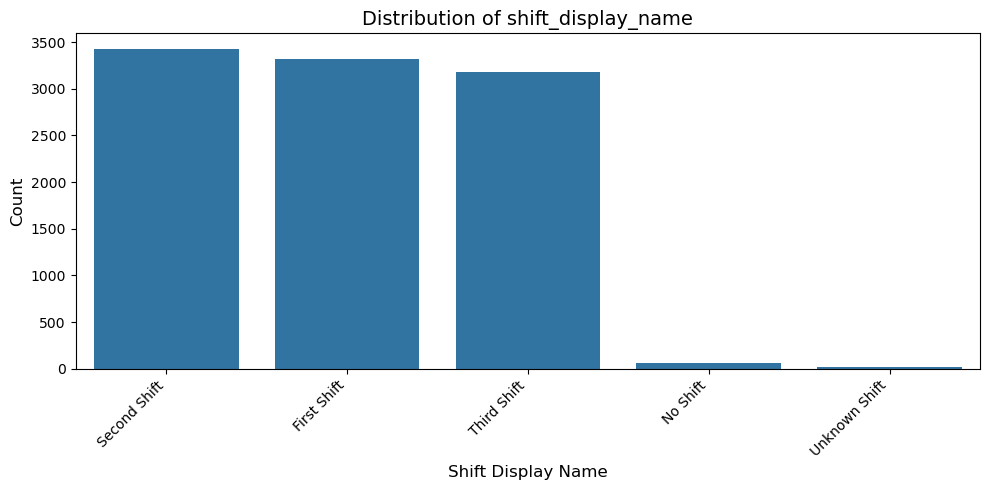

In [15]:
plot_categorical_distribution(production_df, "shift_display_name")

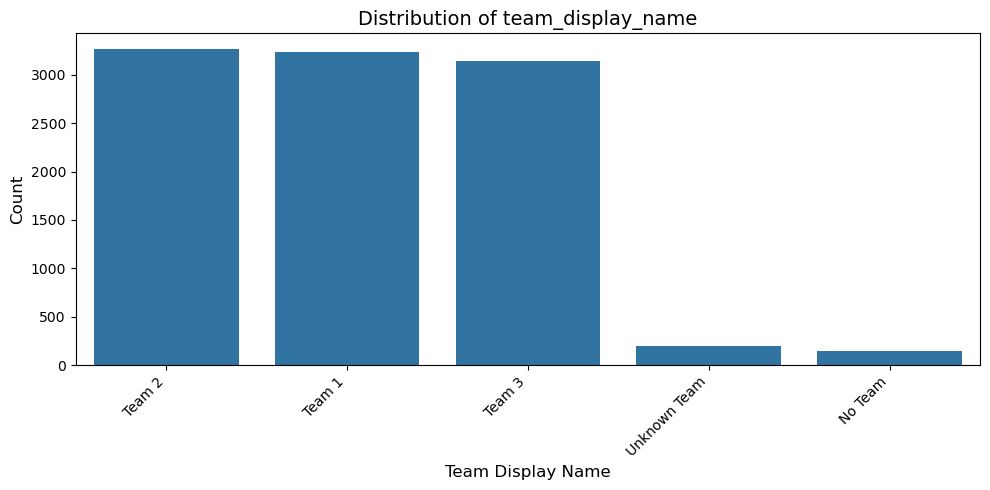

In [16]:
plot_categorical_distribution(production_df, "team_display_name")

In [17]:
na_team = production_df[production_df['team_display_name'].isin(['No Team', 'Unknown Team'])]

In [18]:
na_team['process_state_display_name'].value_counts()

process_state_display_name
Running          195
No Production     90
Down              33
Changeover        21
Not Monitored      5
Meal/Break         2
Name: count, dtype: int64

Among rows labeled with "No Team" or "Unknown Team", the most frequent  `process_state_display_name values` are "Running" (195 occurrences), "No Production" (90), and "Down" (33). The presence of active states such as "Running" and "Changeover" suggests that these entries are not entirely missing but may instead reflect mislabeling or default values for the team name. While this points to potential data quality issues, the fact that these records include meaningful production activity indicates they are still relevant for our overall production line analysis. Therefore, we will retain these records in our current analysis. However, for future or more granular team-level evaluations, it may be valuable to further investigate and clean this subset of the data.

In [19]:
na_shift = production_df[production_df['shift_display_name'].isin(['No Shift', 'Unknown Shift'])]

In [20]:
na_shift['process_state_display_name'].value_counts()

process_state_display_name
No Production    74
Name: count, dtype: int64

For rows labeled with "Unknown Shift" or "No Shift", all `recorded process_state_display_name` values are "No Production" (74 occurrences). This suggests that these entries likely represent periods when the production line was **inactive**, such as during scheduled downtime or off-shift hours. Given the lack of meaningful activity, these records are less relevant for analyzing active production performance. Therefore, we will retain them in the dataset for completeness but exclude them from shift-level performance comparisons in this project.

#### Numerical Variable Investigation
Let's take a look at some key production numerical variables.

In [21]:
def hist_box_plot(data, feature, fig_size=(12, 7), kde = True, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    fig_size: size of fig (default (12m 7)
    """
    fig, (ax_box, ax_hist) = plt.subplots(nrows = 2, sharex = True, figsize = fig_size)

    sns.boxplot(data = data, x = feature, ax = ax_box, showmeans = True, color = 'violet')

    if bins == None:
        sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist)
    else:
      sns.histplot(data = data, x = feature, kde = kde, bins = bins, ax = ax_hist)

    ax_hist.axvline(data[feature].mean(), color = 'green', linestyle = '--')
    ax_hist.axvline(data[feature].median(), color = 'black', linestyle = '-')

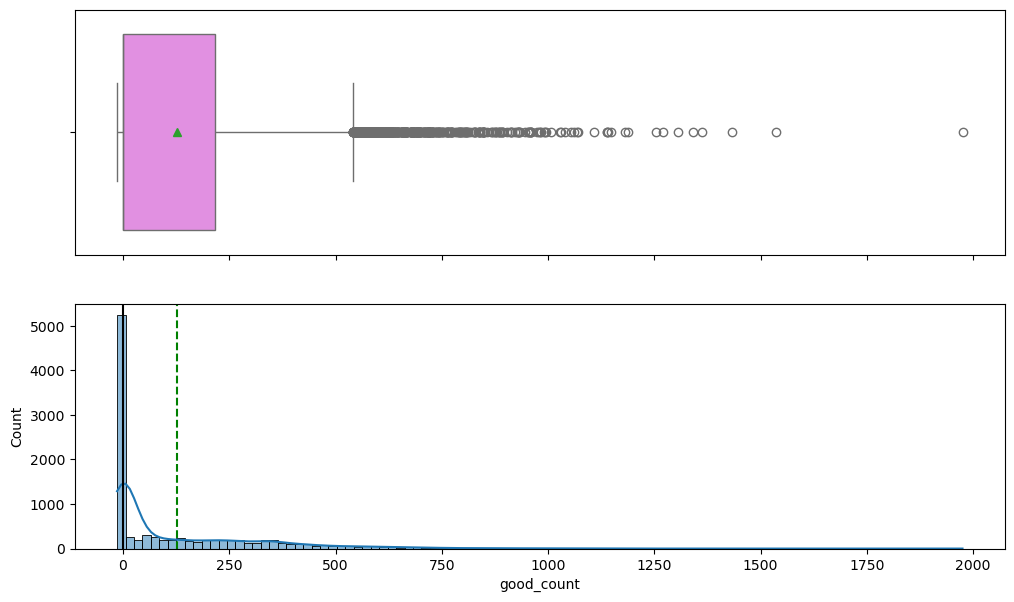

In [22]:
hist_box_plot(production_df,"good_count")

The distribution of `good_count` is right-skewed, with a large number of zero values—likely corresponding to periods of downtime when no products were produced. Although the distribution contains many outliers, this is expected given the nature of the variable, and does not indicate a data quality issue.

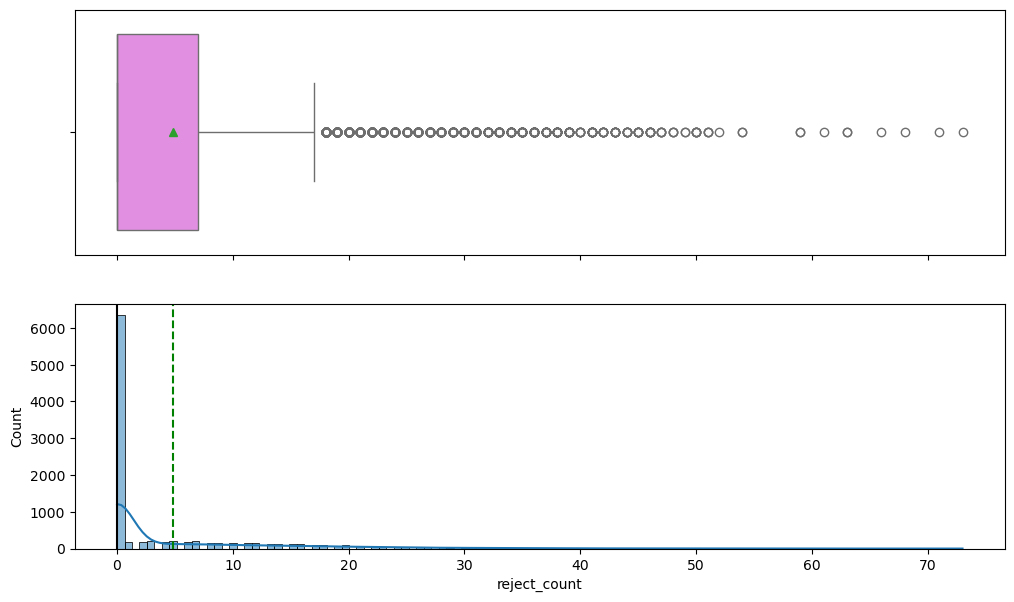

In [23]:
hist_box_plot(production_df,"reject_count")

Similar to `good_count`, the distribution of `reject_count` is also right-skewed with several outliers. However, these outliers may hold valuable insights, as they could indicate periods of unusual production issues or quality concerns. Given the nature of the variable, these deviations are expected and worth further exploration rather than being treated as anomalies.

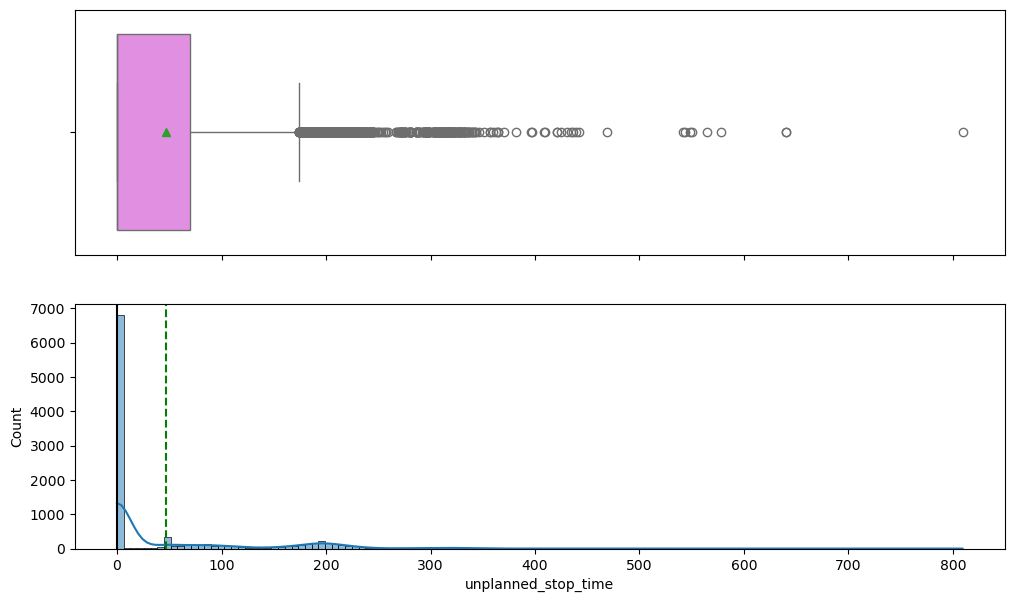

In [24]:
hist_box_plot(production_df,"unplanned_stop_time")

Although the distribution of `unplanned_stop_time` is concentrated on the left, indicating that most unplanned stops are of short duration, it contains a significant number of outliers. These longer unplanned stops warrant further investigation, especially when analyzing downtime patterns and identifying opportunities to improve operational efficiency.

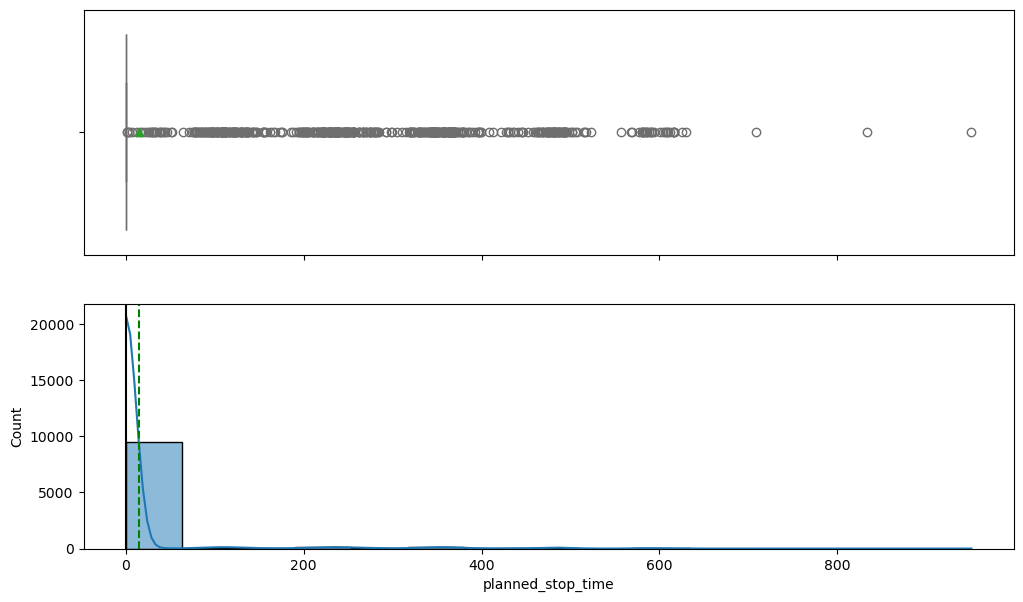

In [25]:
hist_box_plot(production_df,"planned_stop_time")

In contrast to `unplanned_stop_time`, the distribution of `planned_stop_time` is more concentrated around zero, with a narrow interquartile range and a center close to zero. This suggests that planned stops occur less frequently or for shorter durations, with only a few notable outliers.

## Downtime Analysis
#### Calculate total `unplanned_stop_time` and `planned_stop_time`. What is the overall proportion of each?

In [26]:
query = """
    SELECT 
        pm."deviceKey", 
	    pm."unplanned_stop_time",
	    pm."planned_stop_time"
    FROM public."ProductionMetric" pm
"""

downtime_df = pd.read_sql(query, con=engine)
downtime_df.head()

,deviceKey,unplanned_stop_time,planned_stop_time
0,Line3,185.300072,0.0
1,Line3,0.000000,0.0
2,Line4,0.000000,0.0
3,Line2,0.000000,0.0
4,Line1,0.000000,0.0


In [27]:
total_unplanned = downtime_df['unplanned_stop_time'].sum()
total_planned = downtime_df['planned_stop_time'].sum()
total = total_unplanned + total_planned

prop_unplanned = total_unplanned / total
prop_planned = total_planned / total
print(f'The overall proportion of unplanned stop time is: {prop_unplanned*100:.2f}%')
print(f'The overall proportion of planned stop time is: {prop_planned*100:.2f}%')

The overall proportion of unplanned stop time is: 75.99%
The overall proportion of planned stop time is: 24.01%


#### Statistically summarize downtime (mean, median, standard deviation, range) per `deviceKey` (production line). Visualize this comparison (e.g., box plot, bar chart with error bars).

In [28]:
# Use groupby to get the summary stats of downtime per production line
dt_summary_df = downtime_df.groupby('deviceKey').agg({
    'unplanned_stop_time': ['mean', 'median', 'std', 'min', 'max'],
    'planned_stop_time': ['mean', 'median', 'std', 'min', 'max']
})
# Flatten multi-index
dt_summary_df.columns = ['_'.join(col) for col in dt_summary_df.columns]
dt_summary_df.reset_index(inplace=True)
dt_summary_df.T

,0,1,2,3
deviceKey,Line1,Line2,Line3,Line4
unplanned_stop_time_mean,51.576421,49.172053,41.300305,49.006807
unplanned_stop_time_median,0.0,0.0,0.0,0.0
unplanned_stop_time_std,89.929091,84.25179,78.060467,81.67703
unplanned_stop_time_min,0.0,0.0,0.0,0.0
unplanned_stop_time_max,640.208119,809.164892,439.728239,468.443734
planned_stop_time_mean,16.732938,15.078125,13.842797,14.394469
planned_stop_time_median,0.0,0.0,0.0,0.0
planned_stop_time_std,79.98716,74.095999,67.710112,70.585941
planned_stop_time_min,0.0,0.0,0.0,0.0


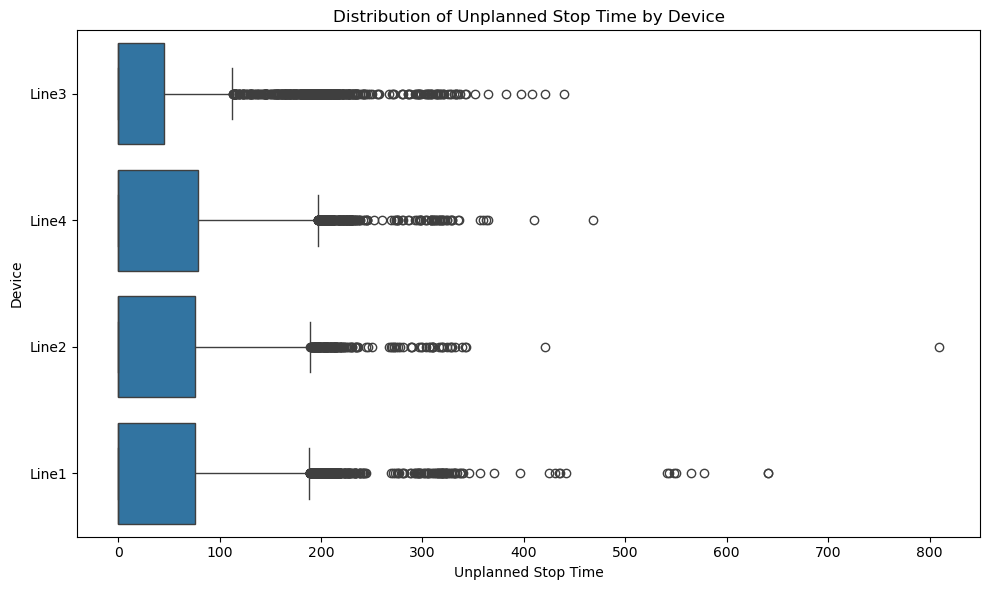

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='deviceKey', x='unplanned_stop_time', data = downtime_df)
plt.title('Distribution of Unplanned Stop Time by Device')
plt.xlabel('Unplanned Stop Time')
plt.ylabel('Device')
plt.tight_layout()
plt.show()

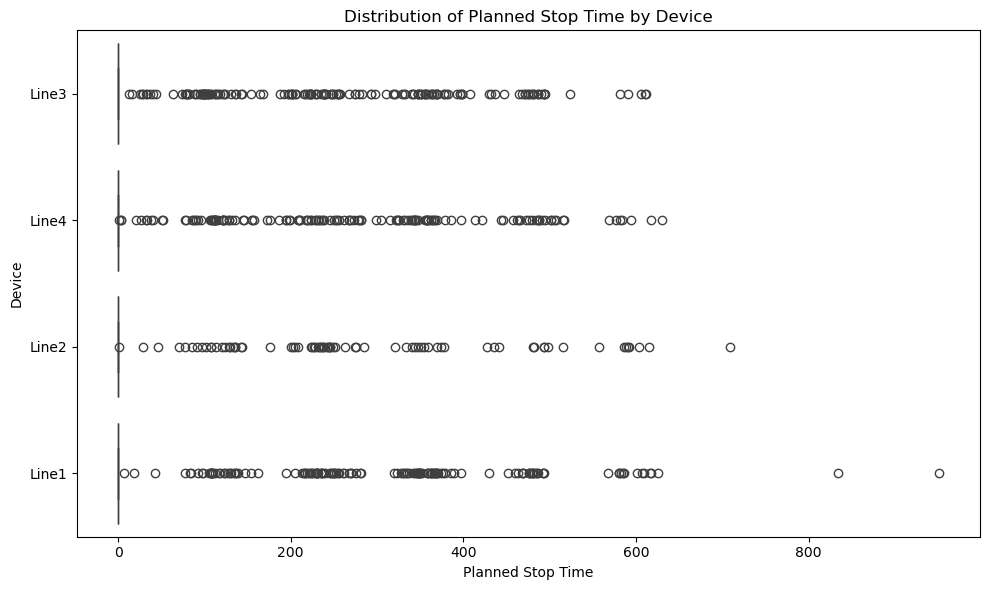

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='deviceKey', x='planned_stop_time', data = downtime_df)
plt.title('Distribution of Planned Stop Time by Device')
plt.xlabel('Planned Stop Time')
plt.ylabel('Device')
plt.tight_layout()
plt.show()

#### Identify the most frequent `process_state_reason_display_name` associated with `unplanned_stop_time`. Visualize the frequency distribution (e.g., Pareto chart/bar chart).

In [31]:
# Write SQL query that calculate the count of events and the sum of unplanned_stop_time group by process_state_reason_display_name
query = """
SELECT pm."process_state_reason_display_name", 
       COUNT(*) AS num_occurrences,
       SUM(pm."unplanned_stop_time") AS total_unplanned_time
FROM public."ProductionMetric" pm
WHERE pm."unplanned_stop_time" > 0
GROUP BY pm."process_state_reason_display_name"
ORDER BY "total_unplanned_time" DESC;
"""

reason_df = pd.read_sql(query, con=engine)

In [32]:
reason_df

,process_state_reason_display_name,num_occurrences,total_unplanned_time
0,Main B Bus Undervolt,418,62982.695112
1,Electrical Fault,414,57034.450261
2,Jam,335,48106.362336
3,Adjustment,291,43895.393584
4,Broken Conveyor,278,40948.108571
5,No Bottles,197,28859.781314
6,Security Alarm,182,27782.819743
7,Missing Reason,180,26170.191916
8,Breakdown,171,25540.865162
9,No Material,175,25021.248353


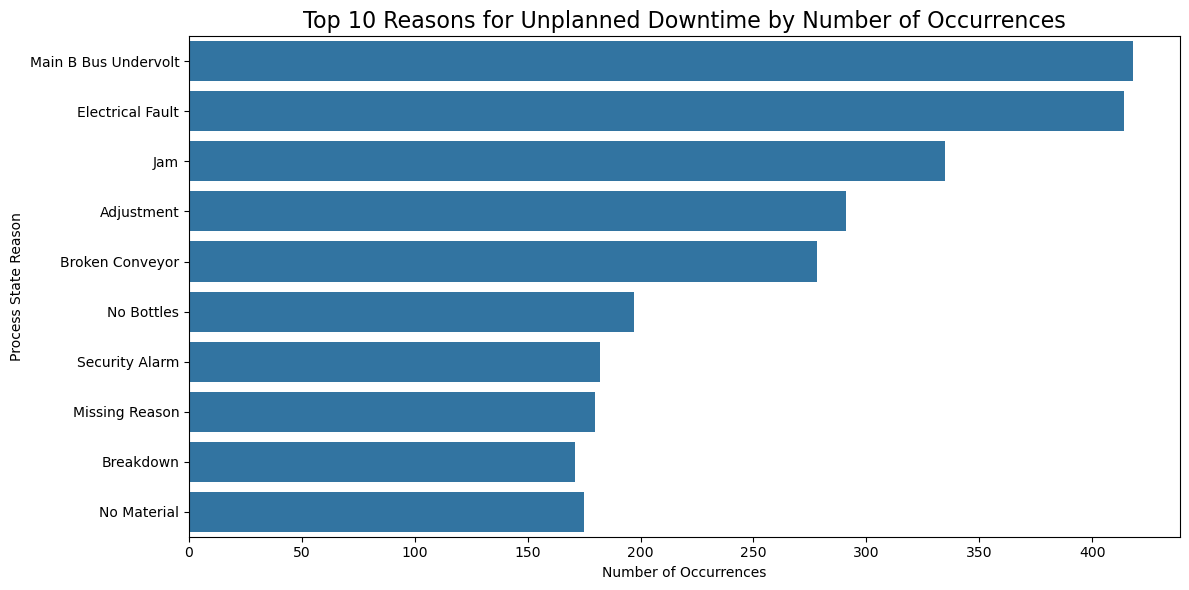

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='num_occurrences',
    y='process_state_reason_display_name',
    data=reason_df.head(10)
)
plt.xlabel('Number of Occurrences')
plt.ylabel('Process State Reason')
plt.title('Top 10 Reasons for Unplanned Downtime by Number of Occurrences', fontsize=16)
plt.tight_layout()
plt.show()

In [34]:
reason_df = reason_df.sort_values(by = 'total_unplanned_time', ascending = False)

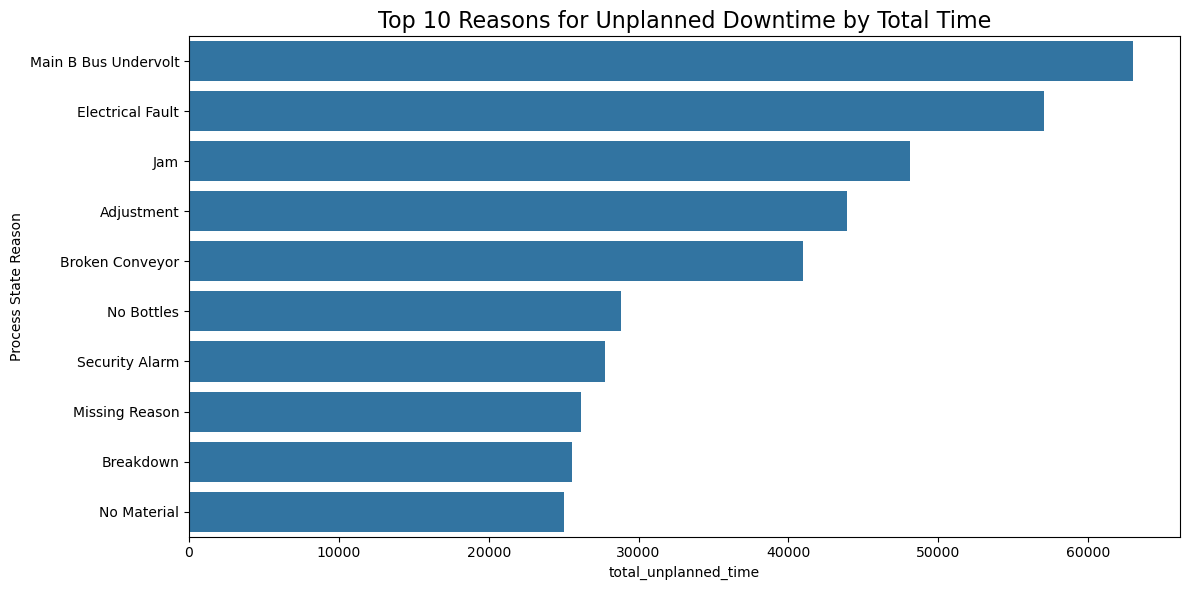

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x='total_unplanned_time',
    y='process_state_reason_display_name',
    data=reason_df.head(10)
)
plt.xlabel('total_unplanned_time')
plt.ylabel('Process State Reason')
plt.title('Top 10 Reasons for Unplanned Downtime by Total Time', fontsize=16)
plt.tight_layout()
plt.show()

The top 10 reasons for Unplanned Downtime sorted by number of occurrence and total unplanned time are identical.  
- **Main B Bus Undervolt** and **Electrical Fault** are the top contributors to total unplanned downtime, both in frequency and total time.  
- All top 10 reasons have similar average durations, ranging from ~137s to ~153s per occurrence. This consistency suggests these events follow known patterns (e.g., standard repair/reset procedures).  
- **Missing Reason** still ranks high in total downtime — this likely reflects incomplete data entry or sensor limitations, and may obscure root cause analysis.  
- **No Bottles** and **No Material** point to upstream supply chain issues or staging inefficiencies and are actionable from a logistics standpoint.  

While the top 10 reasons for unplanned downtime align closely in both frequency and total time, assessing the average unplanned stop duration per occurrence reveals which reasons are the most disruptive on a per-event basis. This view helps identify high-severity downtime drivers that may otherwise be overlooked due to their lower frequency.

In [36]:
reason_df['avg_unplanned_duration_per_occurrence'] = (
    reason_df['total_unplanned_time'] / reason_df['num_occurrences']
)

reason_df = reason_df.sort_values(by = 'avg_unplanned_duration_per_occurrence', ascending=False)

In [37]:
reason_df

,process_state_reason_display_name,num_occurrences,total_unplanned_time,avg_unplanned_duration_per_occurrence
10,No Operator,156,24659.552708,158.074056
12,Power Failure,121,18839.196874,155.695842
6,Security Alarm,182,27782.819743,152.652856
3,Adjustment,291,43895.393584,150.843277
0,Main B Bus Undervolt,418,62982.695112,150.676304
8,Breakdown,171,25540.865162,149.361785
13,Random Inspection,86,12671.912324,147.347818
4,Broken Conveyor,278,40948.108571,147.295355
5,No Bottles,197,28859.781314,146.496352
7,Missing Reason,180,26170.191916,145.389955


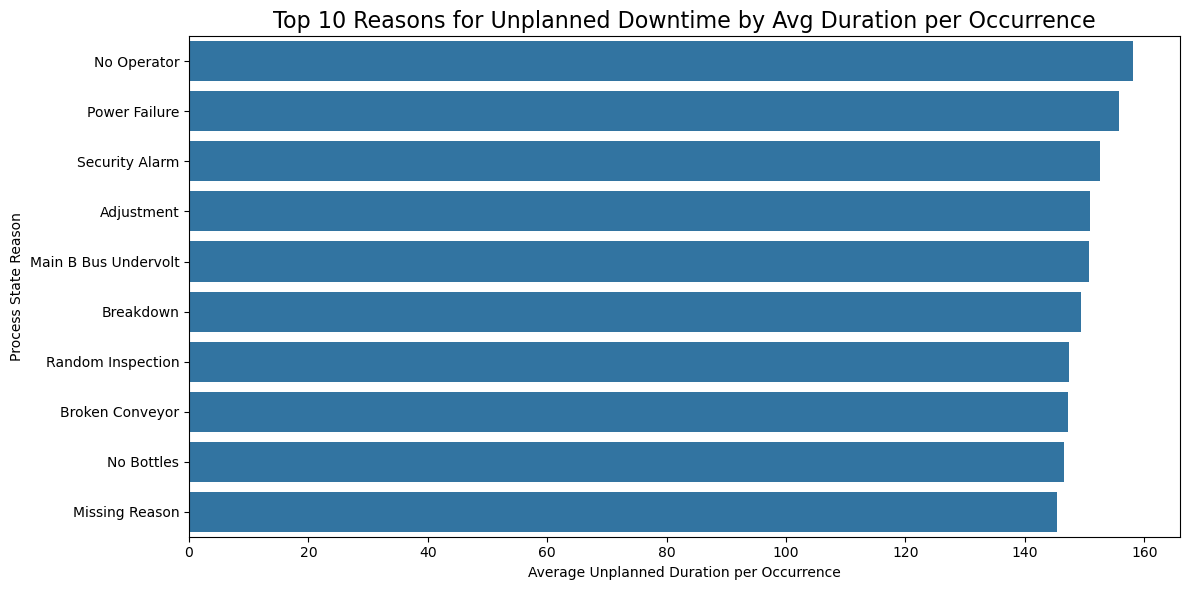

In [38]:
# Plot the barchart of Top 10 Reasons for Unplanned Downtime
plt.figure(figsize=(12, 6))
sns.barplot(
    x='avg_unplanned_duration_per_occurrence',
    y='process_state_reason_display_name',
    data=reason_df.head(10)
)
plt.xlabel('Average Unplanned Duration per Occurrence')
plt.ylabel('Process State Reason')
plt.title('Top 10 Reasons for Unplanned Downtime by Avg Duration per Occurrence', fontsize=16)
plt.tight_layout()
plt.show()

- **No Operator** leads in average unplanned stop duration, at over 158 seconds per event, indicating a significant impact per occurrence. This may point to staffing gaps or delays in handover.  
- **Power Failure** and **Security Alarm** also rank high in severity, suggesting systemic or safety-related issues that require longer reset or resolution times. Frequent technical issues like **Broken Conveyor**, **Adjustment**, and **Breakdown** all fall in the ~147–151s range, indicating they consistently require recovery effort, even if individually common.  
- Although **Random Inspection** has a relatively high average unplanned stop duration, this may not necessarily indicate an issue. Such inspections are often essential for ensuring safety and quality standards, and longer durations could reflect thorough procedures. However, if these inspections consistently exceed typical durations and coincide with a high number of technical failures or unplanned stops elsewhere in the process, it may point to broader operational inefficiencies or compounding issues that warrant further investigation.

#### Recommendations
- Prioritize investigation into **frequent and high-duration issues** like **Main B Bus Undervolt**, **Electrical Fault**, and **Jam**.  
- Work with maintenance/logistics teams to **reduce recurring causes** such as **Broken Conveyor**, **No Material**, and **No Bottles**.  
- Address **Missing Reason** entries by reviewing system data capture or operator reporting processes.  
- Investigate **No Operator** events further — they combine moderate frequency with the highest impact per occurrence.  
- Consider preventive strategies for **Power Failures** and **Security Alarms**, as their durations suggest significant system-level interruptions.

## Production & Quality Analysis

In [39]:
# Write a query that contains all the variables needed for the analysis
query = """
    SELECT 
        pm."prodmetric_stream_key", 
        pm."deviceKey",
        pm."start_time",
        pm."end_time",
	    pm."good_count",
	    pm."reject_count",
        pm."unplanned_stop_time",
        q."reject_reason_display_name"
    FROM public."ProductionMetric" pm
    LEFT JOIN public."Quality" q
    ON pm.prodmetric_stream_key = q."prodmetric_stream_key"
"""

prod_quality_df = pd.read_sql(query, con=engine)

#### Calculate the overall reject rate (total reject_count / total good_count + reject_count). Note: You may need to aggregate counts from ProductionMetric and potentially link Quality data.

In [40]:
reject_rate = prod_quality_df['reject_count'].sum()/(prod_quality_df['reject_count'].sum()+prod_quality_df['good_count'].sum())

print(f"The overall reject rate is: {reject_rate*100:.2f}%")

The overall reject rate is: 4.20%


#### Identify the most common `reject_reason_display_name` from the Quality table. Visualize the frequency distribution.

In [41]:
reject_reason_df = prod_quality_df.groupby('reject_reason_display_name').size().reset_index(name='count')
reject_reason_df = reject_reason_df.sort_values('count', ascending=False)

In [42]:
reject_reason_df.head(10)

,reject_reason_display_name,count
5,Reject,1418
2,Detected by Max WIP,1359
1,Cosmetic Defect,699
3,Out of Spec,630
8,Underweight,627
4,Overweight,622
6,Scratch,602
10,xyz,323
9,foreign particle,307
0,Bad Packaging,304


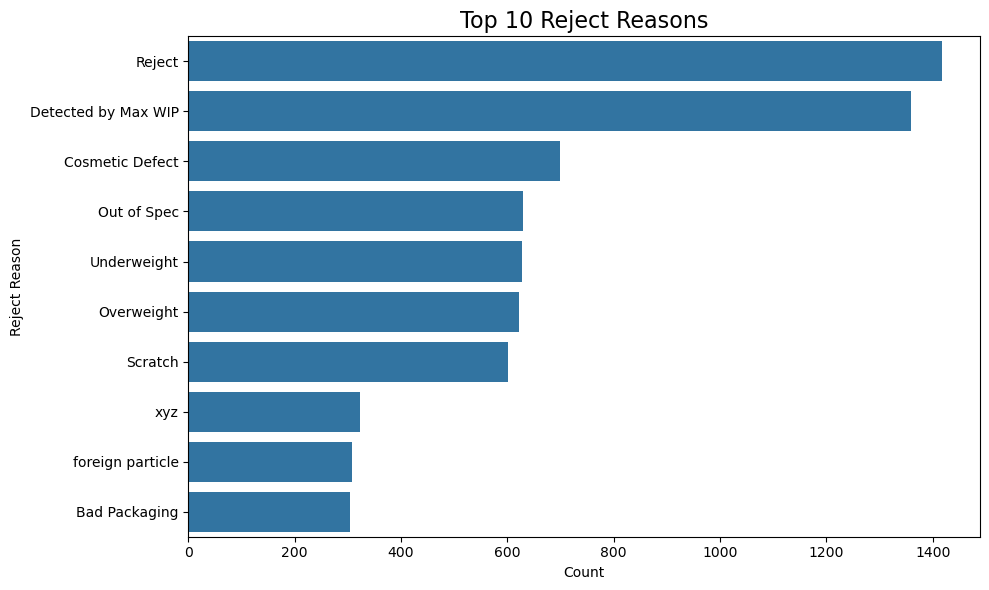

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='count',
    y='reject_reason_display_name',
    data=reject_reason_df.head(10)
)
plt.title('Top 10 Reject Reasons', fontsize = 16)
plt.xlabel('Count')
plt.ylabel('Reject Reason')
plt.tight_layout()
plt.show()

- The most common reason is simply labeled “Reject” — this may be a default or catch-all label, and should be investigated further for clarity.
- Many reasons relate to weight and visual quality (e.g., Overweight, Underweight, Scratch, Cosmetic Defect).
- Entries like "xyz" and generic labels like "Reject" or "Out of Spec" may reflect incomplete tagging or lack of specific classification.

#### Compare the **average good_count per hour of run_time** across different `deviceKeys`. Are there noticeable differences?

In [44]:
# Convert the `start_time` and `end_time` to datetime object before calculating the duration in hours
prod_quality_df['start_time'] = pd.to_datetime(prod_quality_df['start_time'], utc=True)
prod_quality_df['end_time'] = pd.to_datetime(prod_quality_df['end_time'], utc=True)

prod_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13513 entries, 0 to 13512
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   prodmetric_stream_key       13513 non-null  int64              
 1   deviceKey                   13513 non-null  object             
 2   start_time                  13513 non-null  datetime64[ns, UTC]
 3   end_time                    13513 non-null  datetime64[ns, UTC]
 4   good_count                  13513 non-null  int64              
 5   reject_count                13513 non-null  int64              
 6   unplanned_stop_time         13513 non-null  float64            
 7   reject_reason_display_name  7170 non-null   object             
dtypes: datetime64[ns, UTC](2), float64(1), int64(3), object(2)
memory usage: 844.7+ KB


In [45]:
# Now compute duration in hours
prod_quality_df['run_time_hours'] = prod_quality_df['end_time'] - prod_quality_df['start_time']
prod_quality_df['run_time_hours'] = prod_quality_df['run_time_hours'].dt.total_seconds() / 3600
# Calculate good_count_per_hour
prod_quality_df['avg_good_count_per_hour'] = prod_quality_df['good_count'] / prod_quality_df['run_time_hours']

# Group by deviceKey and compute average
avg_good_cnt = prod_quality_df.groupby('deviceKey')['avg_good_count_per_hour'].mean().reset_index()

In [46]:
avg_good_cnt

,deviceKey,avg_good_count_per_hour
0,Line1,1150.001746
1,Line2,1093.887610
2,Line3,944.072069
3,Line4,933.982512


- Line1 and Line2 have noticeably higher average production rates compared to Line3 and Line4, each exceeding 1,090 good units per hour.
- Line3 and Line4 trail behind by over 100 units per hour, which may suggest:

    - Differences in production line efficiency
    - Differences in equipments
    - Process complexity
    - Or potentially higher frequencies of **minor stops** or **slower cycle times**
- The performance gap between Line1 and Line4 is particularly notable (~23% higher on Line1), and may warrant further investigation into the underlying causes.If the lower performance on Line4 is due to a higher frequency of minor stops or operational inefficiencies, it could indicate opportunities for process optimization. Identifying and addressing these potential bottlenecks may lead to meaningful improvements in overall line efficiency.

#### Explore potential relationships: Is there a correlation between `unplanned_stop_time` and `reject_count` for production periods where both occurred? Visualize this relationship (e.g., scatter plot).

In [47]:
# First quickly take a look at the pearson correlation coefficient
from scipy.stats import pearsonr, spearmanr

pearson_corr, _ = pearsonr(prod_quality_df['unplanned_stop_time'], prod_quality_df['reject_count'])

print(f"Pearson Correlation: {pearson_corr:.2f}")

Pearson Correlation: -0.35


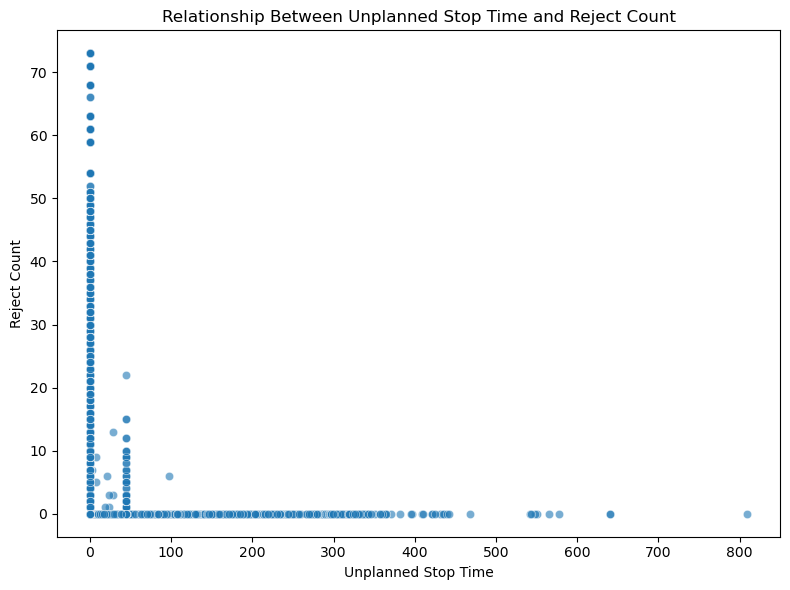

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='unplanned_stop_time',
    y='reject_count',
    data=prod_quality_df,
    alpha=0.6
)
plt.title('Relationship Between Unplanned Stop Time and Reject Count')
plt.xlabel('Unplanned Stop Time')
plt.ylabel('Reject Count')
plt.tight_layout()
plt.show()

Judging by the Pearson correlation coefficient (-0.35), unplanned_stop_time and reject_count exhibit a moderately weak linear relationship. However, the scatter plot reveals a stronger relationship that is not linear in nature. 
- When `unplanned_stop_time` is greater than zero, there are typically few to no reject counts—likely because production halts during unplanned stops, resulting in no opportunity for rejects to occur. 
- In contrast, when there is no unplanned stop, `reject_count` varies more widely, reflecting the normal variability of product quality during active production.
#### Recommendations
- Improve diagnostic precision by refining generic categories such as **"Reject"** and **"Out of Spec."** Introduce clearer subcategories or structured input fields. Support this by training operators and quality staff on proper labeling practices to ensure consistency and enable more targeted root cause analysis.
- Consider metrics like **reject rate per run_time** to more accurately reflect production performance during active periods. This approach ensures that quality metrics align with actual operational conditions rather than being skewed by downtime.
- Although downtime and reject count are not directly correlated, setting up alerts for **abnormal reject rates within short production windows** is highly recommended—if not already in place. Sudden spikes in reject rates during active production may indicate emerging issues such as **equipment wear**, **material defects**, or **operator error**. Monitoring reject rates in near real-time allows for quicker responses, reduces waste, and helps maintain consistent product quality.


## Performance Comparison
#### Compare key metrics (e.g., average downtime per shift, average reject rate per shift) across different shift_display_name or team_display_name. Visualize these comparisons.

#### Average downtime per shift

In [49]:
query = """
    SELECT 
        pm."shift_display_name",
	    avg(pm."unplanned_stop_time")+avg(pm."planned_stop_time") as average_downtime_per_shift
    FROM public."ProductionMetric" pm
    GROUP BY pm."shift_display_name"
"""

avg_downtime_per_shift_df = pd.read_sql(query, con=engine)
avg_downtime_per_shift_df

,shift_display_name,average_downtime_per_shift
0,Second Shift,61.869972
1,No Shift,0.000000
2,First Shift,63.439933
3,Unknown Shift,0.000000
4,Third Shift,62.846622


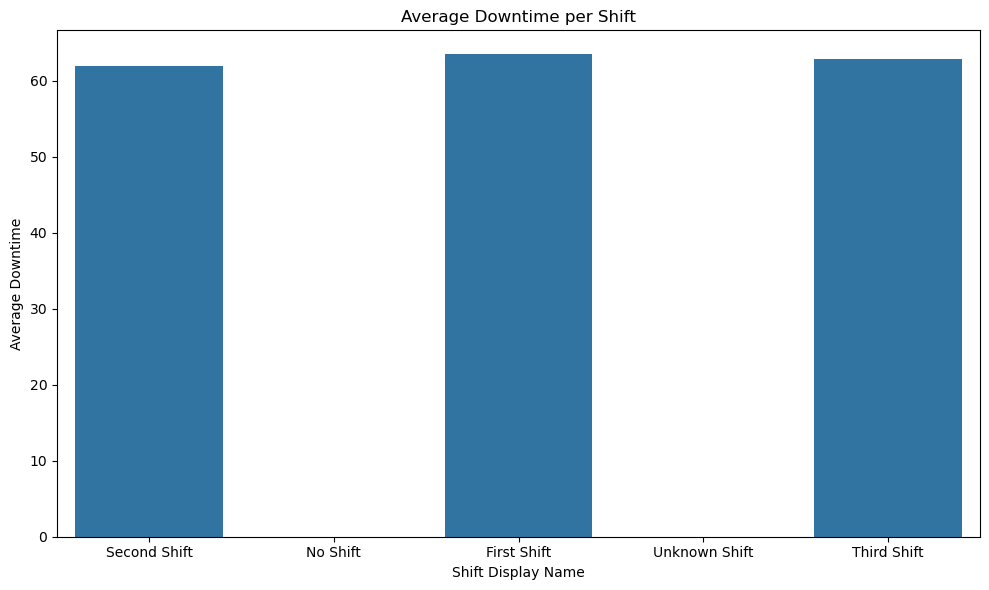

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='shift_display_name',
    y='average_downtime_per_shift',
    data=avg_downtime_per_shift_df
)
plt.title('Average Downtime per Shift')
plt.xlabel('Shift Display Name')
plt.ylabel('Average Downtime')
plt.tight_layout()
plt.show()

- The average downtime is fairly consistent across First, Second, and Third Shifts, with differences of less than 2 seconds—suggesting relatively uniform operational conditions across shifts.
- Entries labeled as "No Shift" and "Unknown Shift" show zero downtime, which likely reflects either:
    - Non-production periods
    - Incomplete or missing shift assignment data

#### Average reject rate per shift

In [51]:
query = """
    SELECT 
        pm."shift_display_name",
	    AVG(COALESCE(pm."reject_count"::FLOAT / NULLIF(pm."reject_count" + pm."good_count", 0), 0)) as average_reject_rate_per_shift
    FROM public."ProductionMetric" pm
    GROUP BY pm."shift_display_name"
"""

avg_reject_rate_per_shift_df = pd.read_sql(query, con=engine)
avg_reject_rate_per_shift_df

,shift_display_name,average_reject_rate_per_shift
0,Second Shift,0.023656
1,No Shift,0.000000
2,First Shift,0.031207
3,Unknown Shift,0.000000
4,Third Shift,0.029481


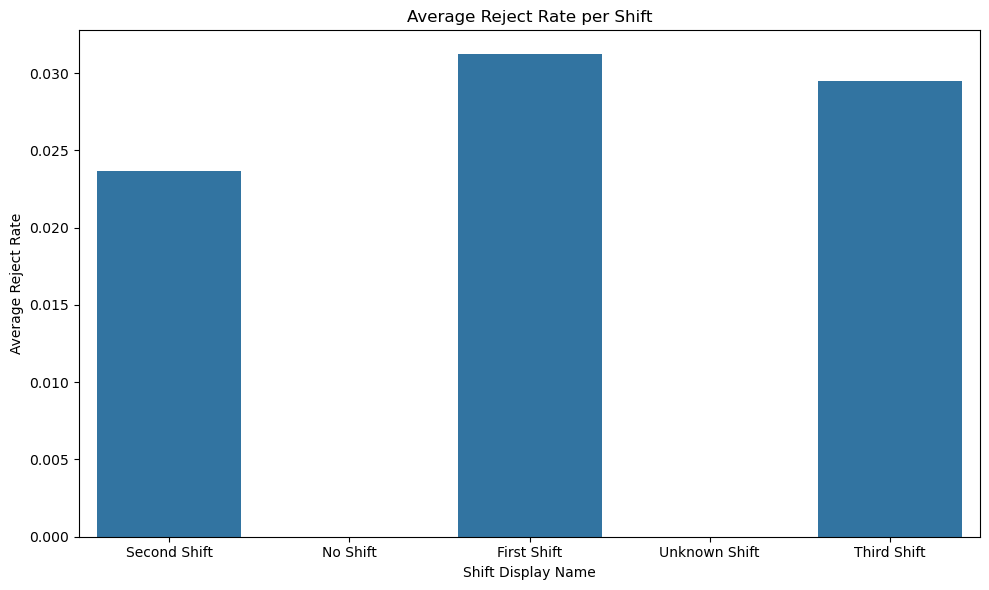

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='shift_display_name',
    y='average_reject_rate_per_shift',
    data=avg_reject_rate_per_shift_df
)
plt.title('Average Reject Rate per Shift')
plt.xlabel('Shift Display Name')
plt.ylabel('Average Reject Rate')
plt.tight_layout()
plt.show()

- First Shift has the highest average reject rate (3.12%), followed closely by Third Shift (2.95%). Second Shift performs better, with the lowest reject rate at 2.37%, suggesting potentially more consistent quality control or operator performance.
- "No Shift" and "Unknown Shift" again show zero reject rates, likely due to non-production periods or incomplete shift labeling. Upon this further investigation, these should be excluded from performance comparisons.
- When paired with downtime analysis, First Shift also has the highest average downtime. This may indicate either more complex production tasks or opportunities for improvement in both uptime and quality performance.



#### Average downtime per team


In [53]:
query = """
    SELECT 
        pm."team_display_name",
	    avg(pm."unplanned_stop_time")+avg(pm."planned_stop_time") as average_downtime_per_team
    FROM public."ProductionMetric" pm
    GROUP BY pm."team_display_name"
"""

avg_downtime_per_team_df = pd.read_sql(query, con=engine)
avg_downtime_per_team_df

,team_display_name,average_downtime_per_team
0,Unknown Team,21.231776
1,Team 2,63.893500
2,No Team,18.382748
3,Team 3,63.507045
4,Team 1,63.864218


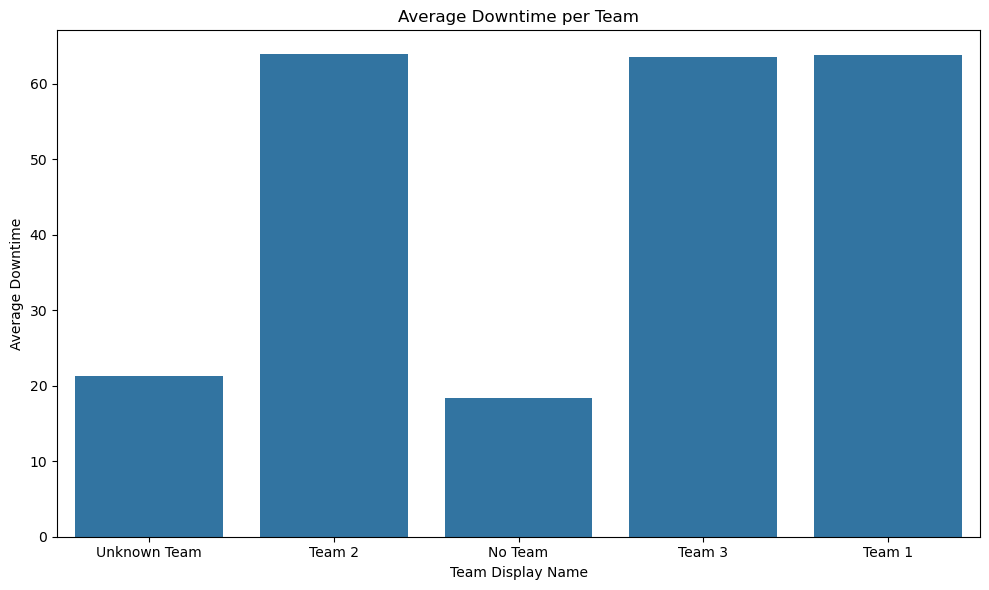

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='team_display_name',
    y='average_downtime_per_team',
    data=avg_downtime_per_team_df
)
plt.title('Average Downtime per Team')
plt.xlabel('Team Display Name')
plt.ylabel('Average Downtime')
plt.tight_layout()
plt.show()

- Teams 1, 2, and 3 exhibit very similar average downtime levels, all just above 63 seconds. This suggests a relatively consistent operational load and process structure across formally assigned teams.
- While the lower downtime for "No Team" and "Unknown Team" might initially seem favorable, these records likely do not reflect typical production scenarios and should be excluded from comparative team performance evaluations.



#### Average Reject Rate per Team

In [55]:
query = """
    SELECT 
        pm."team_display_name",
	    AVG(COALESCE(pm."reject_count"::FLOAT / NULLIF(pm."reject_count" + pm."good_count", 0), 0)) as average_reject_rate_per_team
    FROM public."ProductionMetric" pm
    GROUP BY pm."team_display_name"
"""

avg_reject_rate_per_team_df = pd.read_sql(query, con=engine)
avg_reject_rate_per_team_df

,team_display_name,average_reject_rate_per_team
0,Unknown Team,0.000000
1,Team 2,0.030324
2,No Team,0.001074
3,Team 3,0.026240
4,Team 1,0.029823


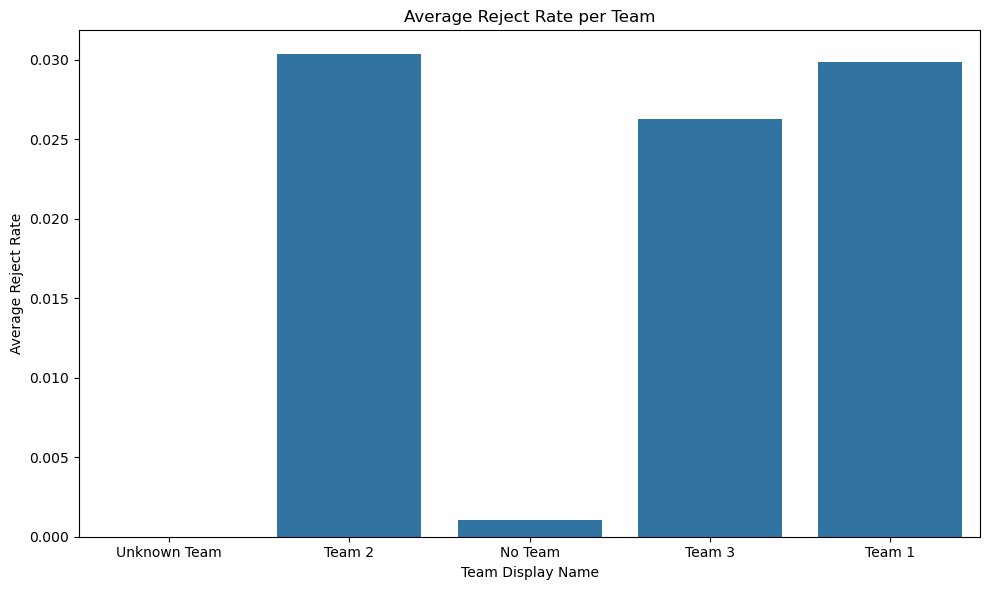

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='team_display_name',
    y='average_reject_rate_per_team',
    data=avg_reject_rate_per_team_df
)
plt.title('Average Reject Rate per Team')
plt.xlabel('Team Display Name')
plt.ylabel('Average Reject Rate')
plt.tight_layout()
plt.show()

- Teams 1, 2, and 3 exhibit fairly consistent reject rates in the 2.6–3.0% range, which aligns with expected quality control variation across normal operations.
- Team 2 has the highest average reject rate (3.03%), slightly higher than Team 1 (2.98%), while Team 3 performs marginally better at 2.62%.
#### Recommendations
- **Support underperforming teams like Team 2,** which experienced the highest reject rate (3.03%) and average downtime (63.89s). Conduct focused reviews of workflows, equipment usage, and team communication to identify improvement opportunities and provide additional training if needed.

- **Promote Team 3’s practices,** which led to the lowest reject rate (2.62%). Investigate contributing factors—such as team structure, leadership, or operational consistency—that could inform broader performance enhancement efforts.

- **Implement regular performance reviews** at the shift and team levels, incorporating metrics such as reject rate and downtime. These reviews can help identify trends, reward high performers, and proactively address emerging issues.
## Conclusion
Overall, the analysis did not uncover any critical performance issues, but it did highlight several opportunities for operational improvement. While production lines performed within a similar range in terms of downtime and efficiency, there were **notable differences at the shift and team levels**, particularly in reject rates and downtime patterns.

One recurring challenge across datasets was the presence of **missing or generic labels**—such as **Reject**, **Unknown Team**, and **No Shift**—which limit the ability to draw precise insights. Improving the consistency and specificity of labeling will be essential for more accurate root cause analysis and continuous improvement efforts.

Although there was **no strong direct correlation** between unplanned downtime and reject count, frequent stops may still influence quality outcomes. This is especially evident in the **team-level analysis**, where teams with higher downtime also tended to have higher reject rates. However, due to limited statistical depth, it is unclear whether these differences are statistically significant.

Moving forward, **establishing benchmarks and implementing real-time monitoring** of key performance indicators—such as reject rates, throughput, and downtime—will be valuable for identifying emerging issues early, supporting decision-making, and fostering a culture of continuous improvement.